## Install Library (Kalau Belum)

In [9]:
%pip install pgmpy
%pip install scikit-learn pandas

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   -------------------------- ------------- 1.3/2.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   ---------------------------------------- 756.0/756.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Library untuk Bayesian Network
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Library untuk Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix

## 1. Dataset dan Variabel - Preprocessing Dataset:

### Analisis statistik deskriptif untuk memahami distribusi data

In [4]:
# baca data dari file csv
df_raw = pd.read_csv("Student_performance_data_.csv")

# Cek 5 baris awal
df_raw.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Statistik deskriptif
df_raw.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Penanganan Missing Value (jika ada)

In [7]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(df_raw.isnull().sum())


Jumlah missing values per kolom:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


*Berdasarkan hasil cek missing value diatas, tidak ditemukan missing value.*

### Mapping Label Kategorikal agar lebih informatif

In [8]:
# Salin data untuk transformasi (mapping + normalisasi)
df_processed = df_raw.copy()

gender_map = {0: "Male", 1: "Female"}
ethnicity_map = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
parental_education_map = {0: "None", 1: "High School", 2: "Some College", 3: "Bachelor's", 4: "Higher"}
parental_support_map = {0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"}
extracurricular_map = {0: "No", 1: "Yes"}
sports_map = {0: "No", 1: "Yes"}
music_map = {0: "No", 1: "Yes"}
volunteering_map = {0: "No", 1: "Yes"}
gradeclass_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
tutoring_map = {0: 'No', 1: 'Yes'}

# Terapkan mapping
df_processed['Gender'] = df_processed['Gender'].map(gender_map)
df_processed['Ethnicity'] = df_processed['Ethnicity'].map(ethnicity_map)
df_processed['ParentalEducation'] = df_processed['ParentalEducation'].map(parental_education_map)
df_processed['ParentalSupport'] = df_processed['ParentalSupport'].map(parental_support_map)
df_processed['Extracurricular'] = df_processed['Extracurricular'].map(extracurricular_map)
df_processed['Sports'] = df_processed['Sports'].map(sports_map)
df_processed['Music'] = df_processed['Music'].map(music_map)
df_processed['Volunteering'] = df_processed['Volunteering'].map(volunteering_map)
df_processed['GradeClass'] = df_processed['GradeClass'].map(gradeclass_map)
df_processed['Tutoring'] = df_processed['Tutoring'].map(tutoring_map)

### Normalisasi atau diskretisasi variabel jika diperlukan

In [12]:
features_to_scale = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

df_scaled = df_processed.copy()
scaler = MinMaxScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

df_scaled.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,0.666667,Female,Caucasian,Some College,0.992773,0.241379,Yes,Moderate,No,No,Yes,No,0.732299,C
1,1002,1.000000,Male,Caucasian,High School,0.771270,0.000000,No,Low,No,No,No,No,0.760729,B
2,1003,0.000000,Male,Asian,Bachelor's,0.210718,0.896552,No,Moderate,No,No,No,No,0.028151,F
3,1004,0.666667,Female,Caucasian,Bachelor's,0.501965,0.482759,No,High,Yes,No,No,No,0.513555,D
4,1005,0.666667,Female,Caucasian,Some College,0.233840,0.586207,Yes,High,No,No,No,No,0.322015,F


### Analisis korelasi untuk mengidentifikasi hubungan awal antar variabel

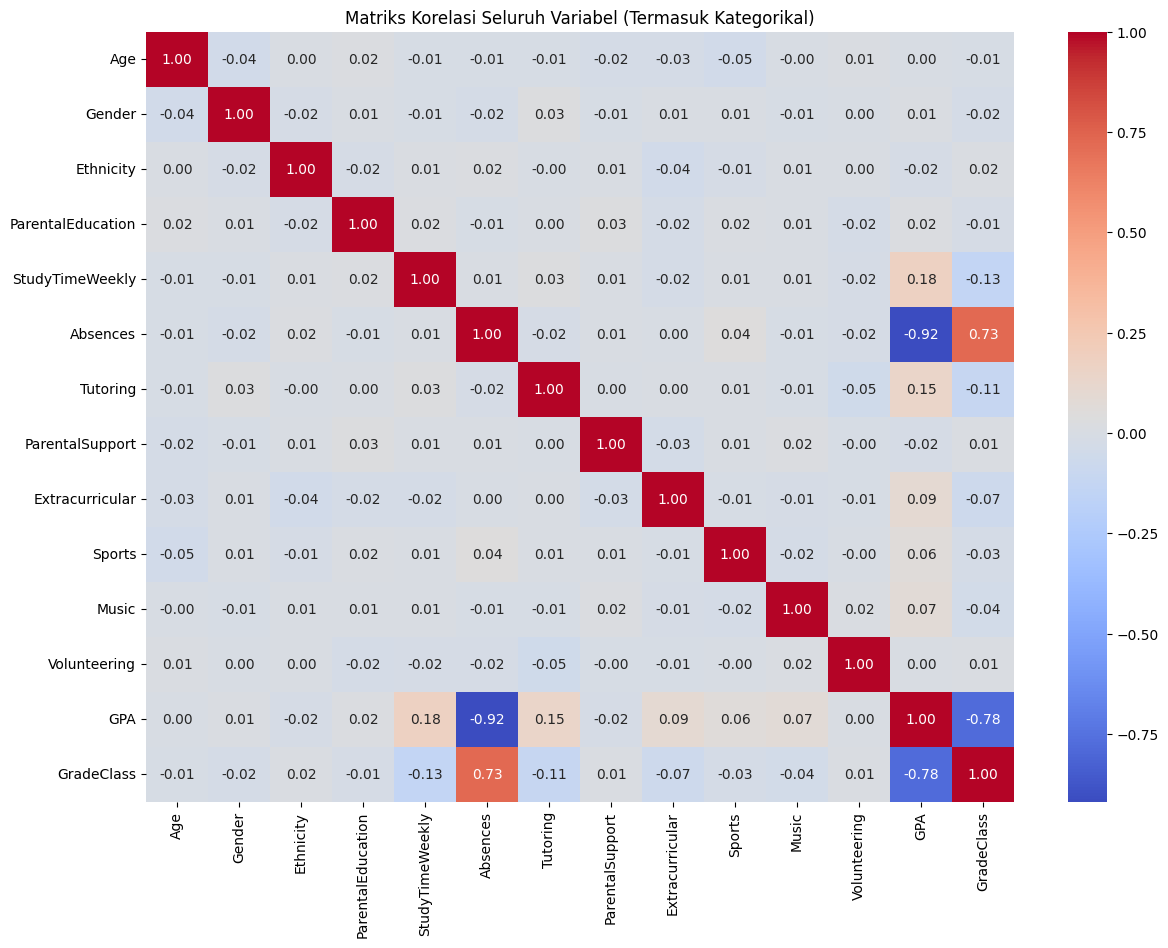

In [13]:
# BELUM PASTI PAHAMI LAGI NTAR APAAN NIH

from sklearn.preprocessing import LabelEncoder

# Salin dataframe
df_encoded = df_scaled.copy()

# Ubah kolom kategorikal menjadi numerik
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Hitung korelasi untuk semua kolom (tanpa StudentID)
correlation_matrix_all = df_encoded.drop(columns=['StudentID']).corr()

# Visualisasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Seluruh Variabel (Termasuk Kategorikal)")
plt.show()


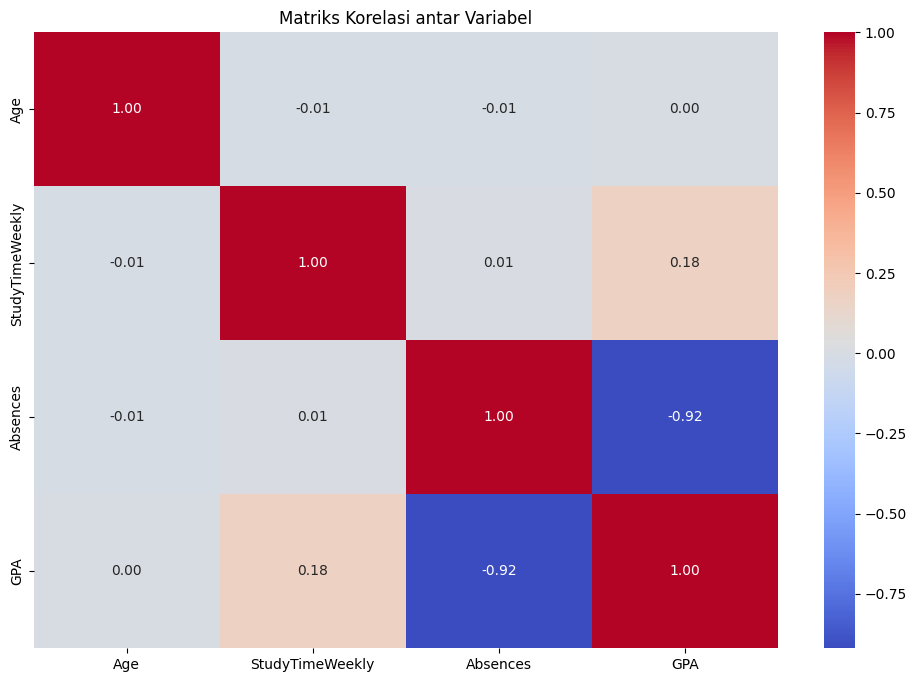

In [14]:

# Korelasi antar variabel numerik
correlation_matrix = df_scaled.drop(columns=['StudentID']).select_dtypes(include=['float64']).corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi antar Variabel")
plt.show()

### Visualisasi distribusi data untuk memahami pola

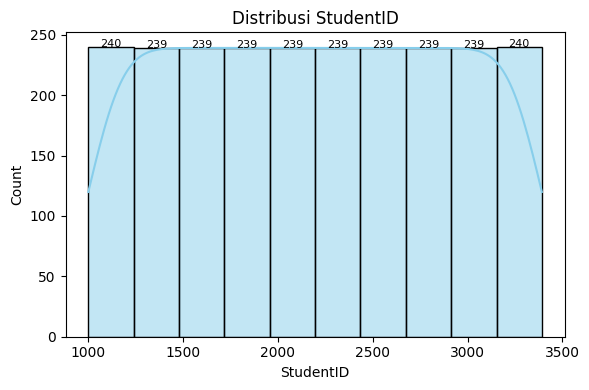

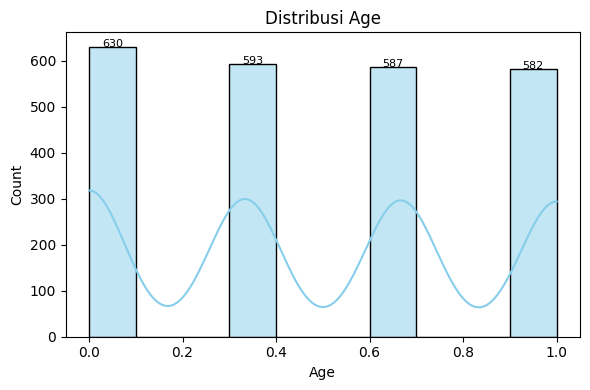

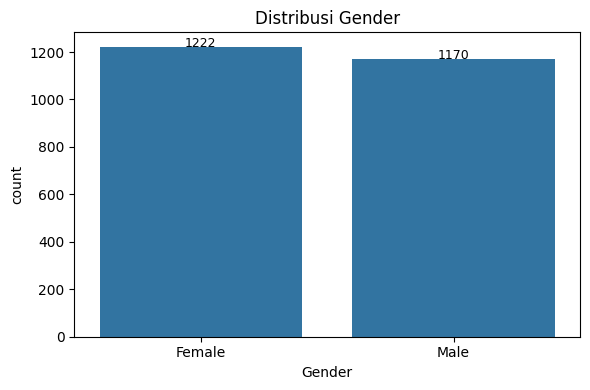

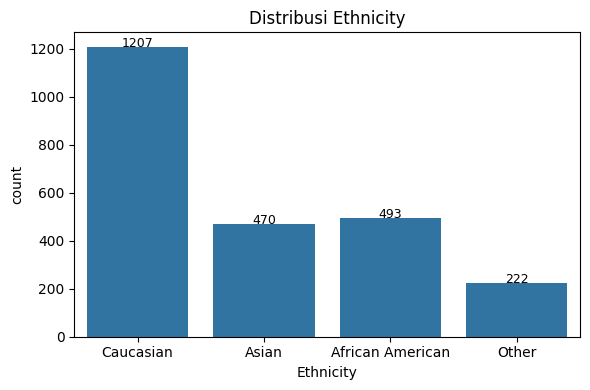

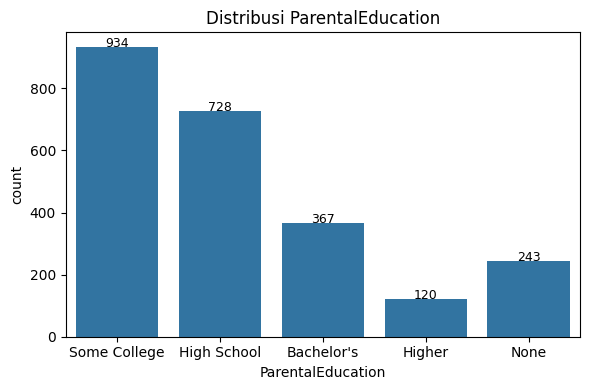

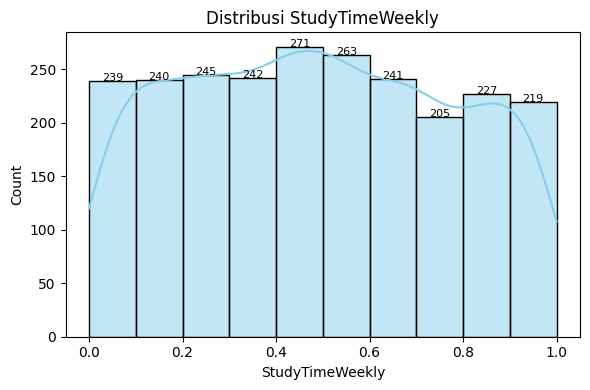

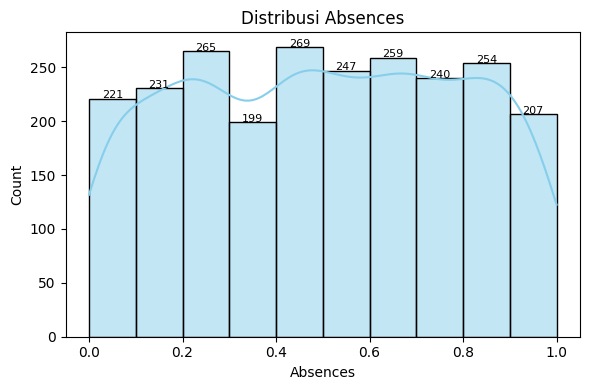

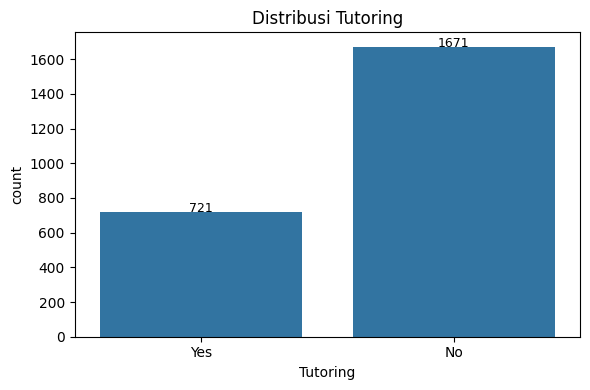

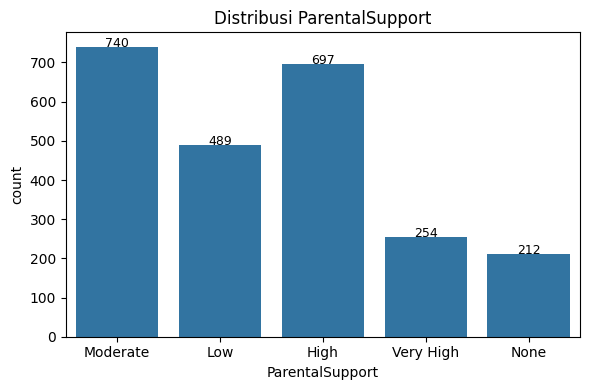

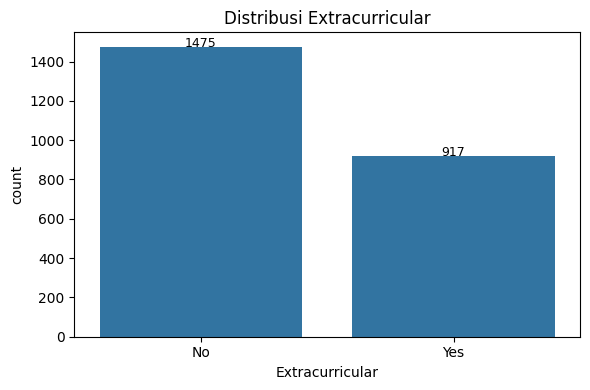

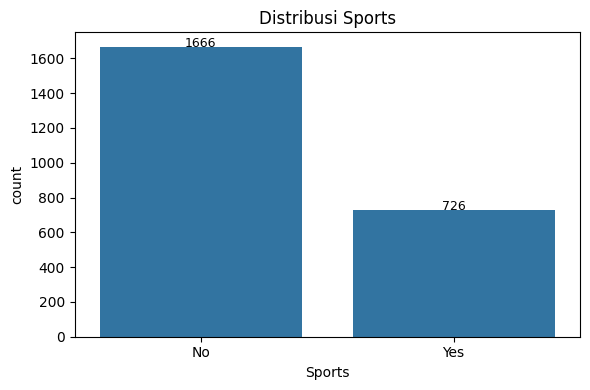

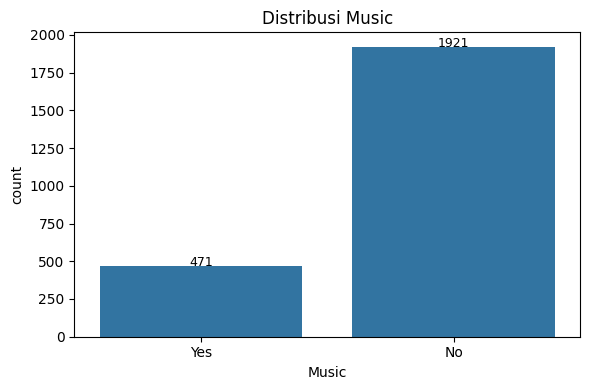

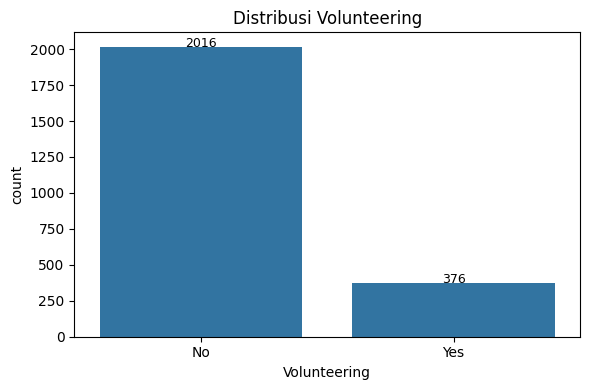

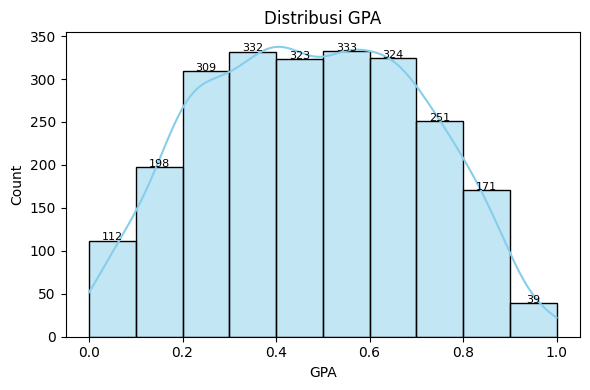

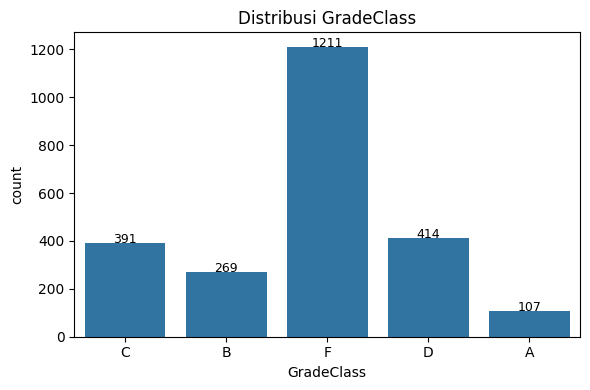

In [16]:
for col in df_scaled.columns:
    plt.figure(figsize=(6, 4))

    if df_scaled[col].nunique() <= 10 and df_scaled[col].dtype == 'object':
        ax = sns.countplot(data=df_scaled, x=col)
        plt.title(f"Distribusi {col}")

        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                        f'{int(height)}', ha="center", fontsize=9)
    elif df_scaled[col].dtype in ['float64', 'int64']:
        ax = sns.histplot(df_scaled[col], kde=True, color='skyblue', bins=10)
        plt.title(f"Distribusi {col}")

        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                        f'{int(height)}', ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()

## 2. Model Penalaran Probabilistik

### 2.1 Bayesian Network

In [17]:
# Diskretisasi variabel numerik
df_bn = df_scaled.copy()
df_bn['StudyTimeWeekly'] = pd.cut(df_bn['StudyTimeWeekly'], bins=3, labels=[0, 1, 2])
df_bn['GPA'] = pd.cut(df_bn['GPA'], bins=5, labels=[0, 1, 2, 3, 4])
df_bn['Absences'] = pd.cut(df_bn['Absences'], bins=3, labels=[0, 1, 2])
df_bn['Age'] = pd.cut(df_bn['Age'], bins=3, labels=[0, 1, 2])

# Label encoding for categorical columns
label_cols = df_bn.select_dtypes(include=['object']).columns
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_bn[col] = le.fit_transform(df_bn[col])
    label_encoders[col] = le

df_bn = df_bn.astype(int)  # pgmpy expects integers

# Struktur Bayesian Network - Tentukan berdasarkan pemahaman domain atau algoritma (ini manual)
model_bn = DiscreteBayesianNetwork([
    ('ParentalSupport', 'GPA'),
    ('ParentalEducation', 'GPA'),
    ('StudyTimeWeekly', 'GPA'),
    ('GPA', 'GradeClass'),
    ('Tutoring', 'GradeClass'),
    ('Gender', 'GradeClass')
])

# Estimasi parameter (CPT) menggunakan Maximum Likelihood
model_bn.fit(df_bn, estimator=MaximumLikelihoodEstimator)

# Inisialisasi inferensi
infer_bn = VariableElimination(model_bn)

# Prediksi berdasarkan evidence
q1 = infer_bn.map_query(variables=['GPA'], evidence={'ParentalSupport': 3, 'StudyTimeWeekly': 2})
q2 = infer_bn.map_query(variables=['GradeClass'], evidence={'GPA': q1['GPA'], 'Tutoring': 1})

# Print hasil prediksi
print("Prediksi GPA:", q1['GPA'])
print("Prediksi GradeClass:", q2['GradeClass'])

# Cek nilai unik dari variabel
print(df_bn['StudyTimeWeekly'].unique())
print(df_bn['ParentalSupport'].unique())


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'StudentID': 'N', 'Age': 'N', 'Gender': 'N', 'Ethnicity': 'N', 'ParentalEducation': 'N', 'StudyTimeWeekly': 'N', 'Absences': 'N', 'Tutoring': 'N', 'ParentalSupport': 'N', 'Extracurricular': 'N', 'Sports': 'N', 'Music': 'N', 'Volunteering': 'N', 'GPA': 'N', 'GradeClass': 'N'}


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Prediksi GPA: 1
Prediksi GradeClass: 4
[2 0 1]
[2 1 0 4 3]


### 2.2. Metode Tambahan - Naive Bayes Classifier (NB)

In [20]:
# Label encoding untuk kolom kategorikal
df_encoded_ap = df_scaled.copy()

# Ubah kolom kategorikal menjadi numerik
for col in df_encoded_ap.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded_ap[col] = le.fit_transform(df_encoded_ap[col])

# Pisahkan data untuk model
X = df_encoded_ap.drop(columns=['GradeClass'])
y = df_encoded_ap['GradeClass']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi dengan model Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasinya Naive Bayes:", accuracy_nb)

Akurasinya Naive Bayes: 0.7515657620041754


### 2.3. Metode Tambahan - Gaussian Mixture Model (GMM)

In [24]:
# Gaussian Mixture Model (GMM)
# GMM untuk clustering dan prediksi probabilitas
gmm_model = GaussianMixture(n_components=5, random_state=42)
gmm_model.fit(X_train)

# Prediksi dengan GMM
y_pred_gmm = gmm_model.predict(X_test)

# Evaluasi model Gaussian Mixture
accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
print("Akurasinya Gaussian Mixture Model:", accuracy_gmm)

# Prediksi hasil untuk data uji
print("\nPrediksi Naive Bayes untuk data uji:")
print(y_pred_nb)

print("\nPrediksi Gaussian Mixture Model untuk data uji:")
print(y_pred_gmm)

Akurasinya Gaussian Mixture Model: 0.16075156576200417

Prediksi Naive Bayes untuk data uji:
[4 2 3 1 4 2 4 3 3 4 3 4 2 3 2 4 4 4 3 3 3 4 4 2 4 4 4 2 3 3 4 4 2 1 4 4 2
 2 2 4 2 1 4 3 4 3 2 4 2 4 2 1 4 4 3 1 3 1 4 3 4 4 2 4 4 3 1 2 4 1 1 4 2 2
 4 2 3 4 4 4 3 1 3 4 4 4 1 4 4 4 2 4 4 4 4 4 1 4 4 4 4 3 4 4 4 3 2 4 4 4 3
 3 1 4 4 4 3 2 4 3 4 2 1 4 4 4 1 4 3 2 4 1 2 4 4 4 3 4 4 4 2 4 1 4 2 4 4 3
 1 4 2 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 1 1 4 4 3 2 4 3 4 2 3 4 2 2
 2 1 4 4 3 4 3 4 4 4 4 4 3 2 2 4 2 4 3 2 3 4 2 3 4 4 4 3 2 2 4 2 2 4 2 4 2
 1 4 3 4 2 2 4 3 4 3 2 4 2 2 4 4 2 4 1 4 4 3 4 4 3 4 4 3 4 1 3 4 3 4 4 3 4
 4 3 4 4 4 3 1 3 4 2 3 4 1 4 4 4 3 4 4 4 2 2 2 3 4 1 3 4 4 4 4 1 4 2 4 2 4
 2 4 4 2 2 3 4 1 3 3 4 2 4 4 4 3 4 4 4 4 2 3 2 4 3 4 4 3 2 4 4 4 2 4 3 1 3
 2 1 2 3 4 4 4 4 4 4 4 3 3 2 1 4 2 1 3 3 3 4 4 3 4 4 3 3 2 3 4 4 2 1 2 3 3
 4 3 3 2 2 4 4 3 1 4 3 2 4 2 2 4 3 3 2 4 3 4 4 2 3 2 2 1 3 2 3 3 2 1 3 2 4
 1 3 1 3 4 3 3 2 3 4 1 2 4 4 4 3 4 4 4 4 2 3 2 1 4 4 2 3 2 4 1 3 4 4 1 2 2
 2 2 4 

### 2.4. Metode Tambahan - Random Forest Classifier

In [25]:
# Menggunakan data yang telah ada (misalnya df sudah terdefinisi sebelumnya)
X = df_encoded.drop('GradeClass', axis=1)  # Fitur
y = df_encoded['GradeClass']  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# ---------------------------------------------
# Random Forest Classifier
# ---------------------------------------------
# Membuat dan melatih model Random Forest
df_random_forest = RandomForestClassifier(random_state=42)
df_random_forest.fit(X_train, y_train)

# Prediksi dengan model Random Forest
y_pred_rf = df_random_forest.predict(X_test)

# Menghitung akurasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasinya Random Forest: {accuracy_rf}")

# Prediksi dengan Random Forest untuk data uji
print("Prediksi Random Forest untuk data uji:")
print(y_pred_rf)

Akurasinya Random Forest: 0.9081419624217119
Prediksi Random Forest untuk data uji:
[4 1 1 0 4 2 3 3 3 4 3 4 2 3 2 4 4 4 3 3 4 4 4 1 4 4 4 2 3 3 3 4 2 1 4 4 1
 2 1 4 2 0 4 3 4 3 2 4 2 4 1 1 4 4 1 1 3 1 4 3 4 3 3 4 4 4 1 3 4 1 0 4 2 2
 4 2 3 4 4 4 3 1 3 4 4 4 0 4 4 4 2 4 4 4 1 4 1 4 4 4 4 3 4 3 4 3 2 4 4 4 4
 3 1 4 4 4 3 2 4 3 4 1 0 4 4 4 2 4 3 2 4 0 2 4 4 4 3 4 4 4 2 4 1 4 2 4 4 2
 1 4 1 4 1 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 3 1 4 1 1 4 4 2 3 4 3 4 2 4 4 2 2
 2 1 4 4 4 4 3 4 4 4 4 4 3 2 3 4 1 2 3 2 3 4 2 3 4 4 4 4 2 2 4 2 1 4 2 4 2
 0 4 4 4 1 2 4 4 4 3 2 4 2 2 4 2 2 4 0 4 4 3 4 4 3 4 4 3 4 2 3 4 3 4 4 3 4
 4 3 4 4 4 4 1 3 4 2 3 4 1 4 4 4 3 4 4 4 2 1 2 4 4 1 3 4 4 4 4 0 4 2 4 2 4
 1 4 4 1 2 4 4 1 3 3 4 2 4 4 4 4 4 4 4 4 2 3 3 4 4 4 4 3 1 4 2 4 2 4 4 2 3
 2 1 2 2 4 4 4 4 4 4 4 3 2 1 1 4 1 1 3 3 3 4 4 3 4 4 3 3 1 3 4 4 2 0 2 0 3
 4 3 3 2 2 4 4 3 1 4 4 2 4 2 2 4 4 4 2 4 3 4 4 3 3 2 2 2 3 2 2 3 3 1 3 1 4
 1 3 1 3 4 3 3 1 4 4 1 2 4 4 4 2 1 4 4 4 3 4 2 1 4 4 2 2 3 4 1 3 4 4 1 2 1
 2 2 4 2 4 4 3 4

### 2.5. Metode Tambahan - Confusion Matrix

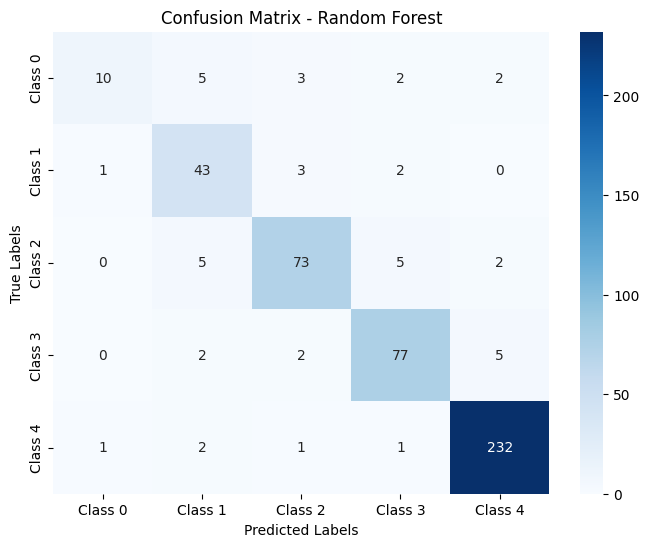

In [27]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 2.6. Metode Tambahan - Gradient Boosting Classifier

In [29]:
# Membuat dan melatih model Gradient Boosting
df_gradient_boosting = GradientBoostingClassifier(random_state=42)
df_gradient_boosting.fit(X_train, y_train)

# Prediksi dengan model Gradient Boosting
y_pred_gb = df_gradient_boosting.predict(X_test)

# Menghitung akurasi Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Akurasinya Gradient Boosting: {accuracy_gb}")

# Prediksi dengan Gradient Boosting untuk data uji
print("Prediksi Gradient Boosting untuk data uji:")
print(y_pred_gb)

Akurasinya Gradient Boosting: 0.9206680584551148
Prediksi Gradient Boosting untuk data uji:
[4 1 0 0 4 2 3 3 3 4 1 4 2 3 2 4 4 4 3 3 4 4 4 1 4 4 4 1 3 3 3 4 2 1 4 4 1
 2 1 4 1 0 4 3 4 3 2 4 2 4 1 1 4 4 0 1 3 1 4 3 4 3 3 4 4 4 3 3 4 1 0 4 2 2
 4 2 3 4 4 4 3 1 3 4 4 4 0 4 2 4 2 4 4 4 1 4 1 4 4 4 4 3 4 2 4 3 2 4 4 4 4
 3 0 4 4 4 3 4 4 3 4 1 0 4 4 4 2 4 3 2 4 0 2 4 4 4 3 4 4 4 2 4 1 4 2 4 4 2
 1 4 1 4 0 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 3 1 4 1 1 4 4 2 3 4 3 4 2 4 4 2 2
 2 1 1 4 4 4 3 4 4 4 4 4 3 2 3 4 1 3 2 2 3 4 2 3 4 4 4 4 2 2 4 2 1 4 2 4 2
 0 4 4 4 1 2 4 4 4 3 2 4 2 2 4 1 2 4 0 4 4 3 4 4 3 4 4 3 4 2 3 4 3 4 4 3 4
 4 3 4 4 0 4 1 4 4 2 3 4 1 4 4 4 3 4 4 4 2 1 2 4 4 1 3 1 4 3 4 0 4 2 4 2 4
 1 4 4 1 2 4 4 1 3 2 2 2 4 4 4 4 4 4 4 4 2 3 3 4 4 4 4 3 1 4 4 4 2 4 4 2 3
 2 1 2 2 4 4 4 4 4 1 4 3 2 1 1 4 1 1 3 3 3 1 4 3 4 4 3 3 1 3 3 4 2 0 2 0 3
 4 3 3 1 2 4 4 1 3 4 4 2 4 2 2 4 4 4 2 4 3 4 4 2 3 2 1 2 3 2 2 3 3 1 3 1 4
 0 3 1 3 4 3 3 1 4 4 0 2 4 4 4 2 1 4 4 4 3 4 2 1 4 4 2 2 3 4 1 3 4 4 1 2 1
 2 2 4 2

# its bottom